# (65803) Didymos propagation test

In [1]:
import grss
prop = grss.prop
fit = grss.fit

In [2]:
import numpy as np
np.set_printoptions(precision=40, linewidth=np.inf)
import matplotlib.pyplot as plt

In [3]:
pos = [-4.739057923859238E-01, 1.095212783390737E+00, 5.270678006987460E-01]
vel = [-1.653652752454120E-02, -8.564528317342794E-04, 6.471815241318629E-04]
ng_params = prop.NongravParamaters()
ng_params.a1 = 0.0
ng_params.a2 = -1.042309691002E-14
ng_params.a3 = 0.0
ng_params.alpha = 1.0
ng_params.k = 0.0
ng_params.m = 2.0
ng_params.n = 0.0
ng_params.r0_au = 1.0
init_cov = np.zeros((7, 7))

In [4]:
de_kernel = 441
de_kernel_path = grss.utils.default_kernel_path(de_kernel)
t0 = 59956.5
numDays = 3000
tf = t0 + numDays
prop_sim = prop.propSimulation("(65803) Didymos propagation test", t0, de_kernel, de_kernel_path)

In [5]:
t_temp = t0
t_eval = []
while t_temp <= tf:
    t_eval.append(t_temp)
    t_temp += 1.0

eval_apparent_state = False
t_eval_utc = False
converged_light_time = False
prop_sim.set_integration_parameters(tf, t_eval, t_eval_utc, eval_apparent_state, converged_light_time)

In [6]:
didymos = prop.IntegBody("(65803) Didymos", t0, 0.0, 0.0, pos, vel, init_cov, ng_params)
prop_sim.add_integ_body(didymos)

In [7]:
prop_sim.integrate()

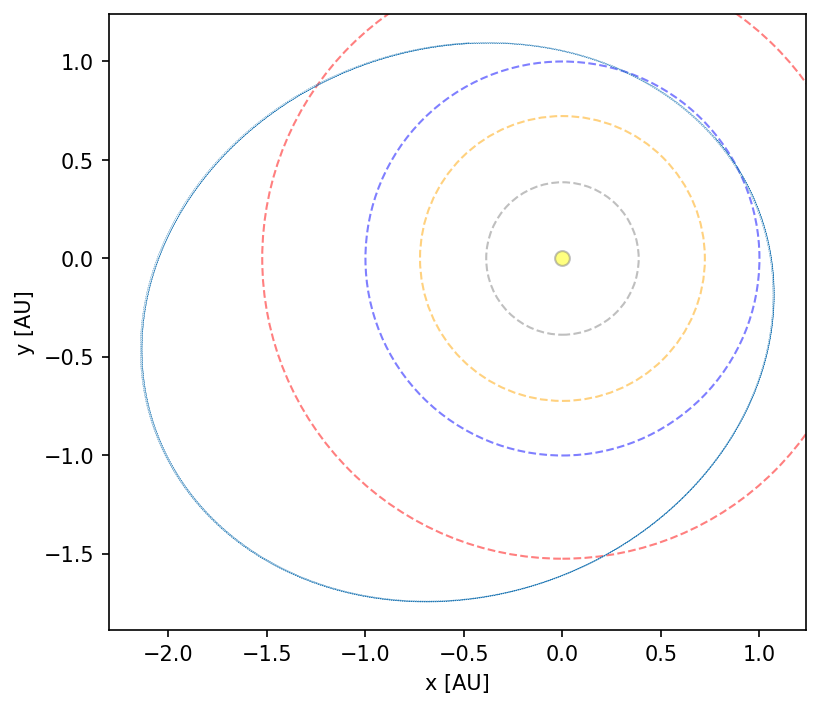

In [8]:
arr = np.array(prop_sim.xIntegEval)
# plot xy and xz projections of the orbit in a 2x1 subplot
plt.figure(figsize=(6, 6), dpi=150)
axs = plt.gca()
prop.plot_solar_system(axs, xy_plane=True, alpha=0.5)
axs.plot(arr[:,0], arr[:,1], '--', lw=0.2)
axs.set_xlabel("x [AU]")
axs.set_ylabel("y [AU]")
axs.set_aspect('equal')
plt.show(block=False)
plt.close()

In [9]:
jpl = np.array([ 1.1601957603540887e+11,  9.1763914866120560e+10,  3.4431641402258896e+10, -2.1333356367475884e+04,  2.4445528524826328e+04,  1.2446287491647476e+04])
grss = np.array(prop_sim.xInteg) * prop_sim.consts.du2m
grss[3:6] /= 86400.0
pos_diff = np.linalg.norm((jpl-grss)[:3])
def test_didymos():
    assert pos_diff < 100.0